In [15]:
# ==================================================================================================================
# ===========================================> Instalación librerías <==============================================
# ==================================================================================================================

#%pip install pandas    # NO HACE FALTA INSTALAR
#%pip install numpy     # NO HACE FALTA INSTALAR
#%pip install pickle    # NO HACE FALTA INSTALAR
#%pip install sklearn   # NO HACE FALTA INSTALAR

#%pip install scikit-learn          # DESCOMENTAR LA PRIMERA VEZ
#%pip install category_encoders     # DESCOMENTAR LA PRIMERA VEZ
#%pip install lightgbm              # DESCOMENTAR LA PRIMERA VEZ
#%pip install matplotlib            # DESCOMENTAR LA PRIMERA VEZ
#%pip install seaborn               # DESCOMENTAR LA PRIMERA VEZ



In [3]:
# ==================================================================================================================
# ===========================================> Carga librerías <====================================================
# ==================================================================================================================

import pandas as pd
import numpy as np
import pickle

# Transformación de datos
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
import category_encoders as ce

# Modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

# Seleccion de variables y tuning de hiperparámetros
from sklearn.feature_selection import RFECV, RFE
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Métricas para evaluar un modelo de clasificación
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_curve, roc_auc_score, average_precision_score, confusion_matrix

# Librerías para visualización de resultados
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesado y modelado
# ------------------------------------------------------------------------------
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz, export_text
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import accuracy_score, confusion_matrix, auc, plot_roc_curve, roc_curve, classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, auc, RocCurveDisplay , roc_curve, classification_report

# Para que no se corten el listado de filas y columnas al ejecutar instrucciones
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# ==================================================================================================================
# ===========================================> Carga Datos <========================================================
# ==================================================================================================================


#datos = pd.read_csv('../data/train.csv', low_memory=False)
datos = pd.read_csv('../data/train_dev.csv', low_memory=False)         # 20.000 filas del fichero train para trabajar en desarrollo

# =====================> EDA

In [18]:
# ==================================================================================================================
# ===========================================> Exploración número de columnas <=====================================
# ==================================================================================================================

len(datos.columns)

83

In [19]:
# ==================================================================================================================
# ===========================================> Exploración estadisticas basicas col numericas <=====================
# ==================================================================================================================

datos.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,20000.0,19920.000000,20000.000000,919.000000,19932.000000,19932.000000,19932.000000,20000.000000,20000.000000,19231.000000,13836.000000,20000.000000,20000.000000,20000.000000,20000.000000,19934.000000,20000.000000,18831.000000,19872.000000,19789.000000,19977.000000,19788.000000,19768.000000,19896.00000,19896.000000,19896.000000,1.986700e+04,1.986700e+04,20000.000000,19821.000000,19899.000000,19899.000000,19899.000000,1.938600e+04,20000.000000,20000.000000,19877.000000,20000.000000,20000.000000,3429.0,19637.0,7393.000000,19586.000000,19623.000000,20000.000000,7410.0,19962.000000,20000.000000,20000.000000,19826.000000,19342.000000,19342.000000,20000.000000
mean,0.0,6.844177,0.017450,1642.094668,47909.091712,1.321343,1.020419,0.988500,107.849150,81577.019864,24.898742,169.891250,123.080250,15716.336600,575.448800,0.943965,0.000150,0.000372,126.576540,0.978928,0.993693,2227.467708,238994.413699,4.00965,4.530006,2368.164304,5.144343e+05,3.747166e+05,0.080250,6179.748550,16.720735,1546.303885,897.120911,1.128576e+09,15832.326550,958.740750,14.570207,60.292200,0.000500,0.0,0.0,0.000135,399.102982,32946.336340,0.485900,0.0,0.006562,0.127550,0.036800,0.058459,0.282287,7.883156,0.497650
std,0.0,1.030542,0.130944,999.462506,14032.888132,0.517944,0.168322,0.106622,63.623981,49037.455634,5.639791,90.081431,69.584279,2190.675639,247.996478,0.229995,0.012247,0.019277,42.648981,0.143629,0.079169,1323.332450,72398.720660,2.05626,1.288963,836.900376,3.532577e+05,3.203537e+05,0.271687,4996.137376,6.116803,369.149193,215.328083,1.890422e+09,1960.924083,2892.218853,10.204971,45.014251,0.022356,0.0,0.0,0.011630,222.130431,21315.313995,0.499814,0.0,0.080745,0.333596,0.188275,0.234614,0.450124,4.562318,0.500007
min,0.0,0.000000,0.000000,1.000000,39.000000,1.000000,0.000000,0.000000,1.000000,41.000000,1.000000,1.000000,2.000000,7601.000000,16.000000,0.000000,0.000000,0.000000,39.000000,0.000000,0.000000,86.000000,22.000000,1.00000,1.000000,19.000000,1.480000e+04,1.401200e+04,0.000000,1024.000000,5.500000,640.000000,480.000000,0.000000e+00,10240.000000,0.000000,1.000000,5.000000,0.000000,0.0,0.0,0.000000,11.000000,38.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,788.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,37045.500000,18.000000,89.000000,75.000000,15063.000000,256.000000,1.000000,0.000000,0.000000,111.000000,1.000000,1.000000,1443.000000,189557.000000,2.00000,5.000000,1998.000000,2.384750e+05,1.201860e+05,0.000000,4096.000000,13.900000,1366.000000,768.000000,0.000000e+00,15063.000000,167.000000,8.000000,31.000000,0.000000,0.0,0.0,0.000000,142.000000,12738.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.00

In [20]:
# ==================================================================================================================
# ===========================================> Exploración estadisticas basicas col objectos <=====================
# ==================================================================================================================

datos.describe(include=object)

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,Platform,Processor,OsVer,OsPlatformSubRelease,OsBuildLab,SkuEdition,PuaMode,SmartScreen,Census_MDC2FormFactor,Census_DeviceFamily,Census_ProcessorClass,Census_PrimaryDiskTypeName,Census_ChassisTypeName,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing
count,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000,7,12892,20000,20000,98,19968,19998,20000,5878,20000,20000,20000,20000,20000,20000,20000,20000,20000,20000
unique,20000,2,39,68,2157,4,3,4,9,258,8,1,9,11,2,3,4,26,8,14,218,3,13,17,15,9,6,4,6,7
top,56f5e7711d62d30ecfe27aa02679c063,win8defender,1.1.15200.1,4.18.1807.18075,1.273.1420.0,windows10,x64,10.0.0.0,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,on,RequireAdmin,Notebook,Windows.Desktop,mid,HDD,Notebook,Mobile,lion,10.0.17134.228,amd64,rs4_release,Core,CORE,UUPUpgrade,FullAuto,IS_GENUINE,Retail,Retail
freq,1,19792,8707,11541,251,19316,18153,19346,8776,8241,12383,7,9681,12749,19969,52,12998,11816,13807,4660,3236,18146,8991,7730,7731,5786,8856,17679,10653,18741


In [21]:
# ==================================================================================================================
# ===========================================> Exploración 20 primeras filas <======================================
# ==================================================================================================================

datos.head(20)

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_ProcessorClass,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,56f5e7711d62d30ecfe27aa02679c063,win8defender,1.1.15200.1,4.14.17639.18041,1.275.1796.0,0,7.0,0,NaN,7073.0,3.0,1.0,1,169,20691.0,NaN,277.0,75,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,525.0,224490.0,8.0,5.0,2938.0,NaN,953869.0,HDD,552568.0,0,16384.0,Notebook,15.5,1920.0,1080.0,Mobile,lion,0.000000e+00,10.0.17134.285,amd64,rs4_release,17134,285,Professional,PROFESSIONAL,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,0.0,0.0,Retail,0.0,142.0,37405.0,0,0.0,0.0,0,0,0.0,1.0,3.0,1
1,567cd848df02f63d3ed2502c78aee51e,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1633.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,155,82373.0,18.0,201.0,231,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,NaN,0.0,117.0,ExistsNotSet,1.0,1.0,Notebook,Windows.Desktop,2102.0,275344.0,8.0,5.0,3038.0,NaN,122104.0,SSD,120842.0,0,16384.0,Notebook,17.2,1920.0,1080.0,Mobile,lion,0.000000e+00,10.0.16299.611,amd64,rs3_release_svc_escrow,16299,611,CoreSingleLanguage,CORE_SINGLELANGUAGE,UUPUpgrade,10.0,35,Notify,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,0.0,554.0,33043.0,1,0.0,0.0,0,0,0.0,0.0,10.0,1
2,0d75600ac915b53d897514e876c353be,win8defender,1.1.15100.1,4.14.17613.18039,1.273.950.0,0,7.0,0,NaN,7945.0,2.0,1.0,1,195,10222.0,18.0,258.0,246,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,585.0,328009.0,4.0,5.0,2706.0,NaN,953869.0,HDD,468502.0,0,4096.0,Desktop,19.5,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,8.0,31,FullAuto,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,127.0,57071.0,1,NaN,0.0,0,0,0.0,0.0,1.0,0
3,e26ee472e2bbb953a34d1922288096a1,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1001.0,0,7.0,0,NaN,48066.0,2.0,1.0,1,173,67513.0,18.0,224.0,16,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Detachable,Windows.Desktop,4730.0,290612.0,4.0,5.0,2536.0,NaN,122104.0,SSD,110545.0,0,4096.0,Notebook,11.6,1080.0,1920.0,Mobile,li

In [22]:
# ==================================================================================================================
# ===========================================> Exploración tipos <==================================================
# ==================================================================================================================

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  20000 non-null  object 
 1   ProductName                                        20000 non-null  object 
 2   EngineVersion                                      20000 non-null  object 
 3   AppVersion                                         20000 non-null  object 
 4   AvSigVersion                                       20000 non-null  object 
 5   IsBeta                                             20000 non-null  int64  
 6   RtpStateBitfield                                   19920 non-null  float64
 7   IsSxsPassiveMode                                   20000 non-null  int64  
 8   DefaultBrowsersIdentifier                          919 non-null    float64
 9   AVProd

In [23]:
# ==================================================================================================================
# ===========================================> Exploración nulos <==================================================
# ==================================================================================================================

datos.isna().sum().sort_values(ascending=False)

PuaMode                                              19993
Census_ProcessorClass                                19902
DefaultBrowsersIdentifier                            19081
Census_IsFlightingInternal                           16571
Census_InternalBatteryType                           14122
Census_ThresholdOptIn                                12607
Census_IsWIMBootEnabled                              12590
SmartScreen                                           7108
OrganizationIdentifier                                6164
SMode                                                 1169
CityIdentifier                                         769
Wdft_IsGamer                                           658
Wdft_RegionIdentifier                                  658
Census_InternalBatteryNumberOfCharges                  614
Census_FirmwareManufacturerIdentifier                  414
Census_FirmwareVersionIdentifier                       377
Census_IsFlightsDisabled                               3

In [5]:
# ==================================================================================================================
# ===========================================> Exploración valores y estadísticas <=================================
# ==================================================================================================================

stats_1 = []
# Unique Values         col 
# Unique Values         datos[col].nunique() 
# Unique Values %       (datos[col].nunique() / datos[col].count()) * 100
# Missing Values %      datos[col].isnull().sum() * 100 / datos.shape[0]
# Biggest Category %    datos[col].value_counts(normalize=True, dropna=False).values[0] * 100
# Type                  datos[col].dtype

for col in datos.columns:
    stats_1.append((col, datos[col].nunique(), (datos[col].nunique() / datos[col].count()) * 100, datos[col].isnull().sum() * 100 / datos.shape[0], datos[col].value_counts(normalize=True, dropna=False).values[0] * 100, datos[col].dtype))
    
stats = pd.DataFrame(stats_1, columns=['Feature', 'Unique Values', 'Unique Values %', 'Missing Values %', 'Biggest Category %', 'Type'])
stats.sort_values('Biggest Category %', ascending=False)

,Feature,Unique Values,Unique Values %,Missing Values %,Biggest Category %,Type
5,IsBeta,1,0.005000,0.000,100.000,int64
27,AutoSampleOptIn,2,0.010000,0.000,99.985,int64
28,PuaMode,1,14.285714,99.965,99.965,object
65,Census_IsPortableOperatingSystem,2,0.010000,0.000,99.950,int64
35,Census_DeviceFamily,2,0.010000,0.000,99.845,object
41,Census_ProcessorClass,3,3.061224,99.510,99.510,object
33,UacLuaenable,2,0.010012,0.115,99.255,float64
76,Census_IsVirtualDevice,2,0.010019,0.190,99.155,float64
1,ProductName,2,0.010000,0.000,98.960,object
12,HasTpm,2,0.010000,0.000,98.850,int64


In [25]:
# ==================================================================================================================
# ===========================================> Eliminar valores nulos <=============================================
# ==================================================================================================================

drop_cols_min_nulls = 0.7
drop_cols_nulls = []

for col in datos.columns:
    if datos[col].isna().sum() / len(datos) >= drop_cols_min_nulls:
        drop_cols_nulls.append(col)

datos.drop(columns=drop_cols_nulls, inplace=True)

print(drop_cols_nulls)

['DefaultBrowsersIdentifier', 'PuaMode', 'Census_ProcessorClass', 'Census_InternalBatteryType', 'Census_IsFlightingInternal']


In [26]:
# ==================================================================================================================
# ===========================================> Eliminar valores mal balanceados <===================================
# ==================================================================================================================

drop_cols_min_big_cat = 70
drop_cols_big_cat = []

for col in datos.columns:
    if datos[col].value_counts(normalize=True, dropna=False).values[0] * 100 >= drop_cols_min_big_cat:
        drop_cols_big_cat.append(col) 

datos.drop(columns=drop_cols_big_cat, inplace=True)

print(drop_cols_big_cat)

['ProductName', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'Platform', 'Processor', 'OsVer', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'Firewall', 'UacLuaenable', 'Census_DeviceFamily', 'Census_ProcessorManufacturerIdentifier', 'Census_HasOpticalDiskDrive', 'Census_OSArchitecture', 'Census_IsPortableOperatingSystem', 'Census_GenuineStateName', 'Census_IsFlightsDisabled', 'Census_FlightRing', 'Census_IsVirtualDevice', 'Census_IsTouchEnabled', 'Census_IsPenCapable', 'Census_IsAlwaysOnAlwaysConnectedCapable']


In [27]:
# ==================================================================================================================
# ===========================================> Eliminar valores identificadores <===================================
# ==================================================================================================================

drop_cols_id = []

datos.drop(columns=drop_cols_id, inplace=True)

print(drop_cols_id)

[]


In [6]:
# ==================================================================================================================
# ===========================================> Separar datos por tipos categoricas pequeñas <=======================
# ==================================================================================================================

cat_cols_peq_aux = datos.select_dtypes(include=['object', 'category']).columns.to_list()

cat_cols_peq_max = 5
cat_cols_peq = []

for col in cat_cols_peq_aux:
    if datos[col].nunique() <= cat_cols_peq_max:
        cat_cols_peq.append(col) 

print(cat_cols_peq)

['ProductName', 'Platform', 'Processor', 'OsVer', 'PuaMode', 'Census_DeviceFamily', 'Census_ProcessorClass', 'Census_PrimaryDiskTypeName', 'Census_OSArchitecture', 'Census_GenuineStateName']


In [7]:
# ==================================================================================================================
# ===========================================> Separar datos por tipos categoricas grandes <========================
# ==================================================================================================================

cat_cols_gra_aux = datos.select_dtypes(include=['object', 'category']).columns.to_list()

cat_cols_gra_min = 5
cat_cols_gra = []

for col in cat_cols_gra_aux:
    if datos[col].nunique() > cat_cols_gra_min:
        cat_cols_gra.append(col) 

print(cat_cols_gra)

['MachineIdentifier', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_InternalBatteryType', 'Census_OSVersion', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_ActivationChannel', 'Census_FlightRing']


In [29]:
# ==================================================================================================================
# ===========================================> Separar datos por tipos numericas categoricas <======================
# ==================================================================================================================

#numeric_cols_aux = datos.select_dtypes(include=['float64', 'int64']).columns.to_list()
#numeric_cols_aux.remove('HasDetections') # Posibles labels HasDetections or IsProtected

#numeric_cols_cat_min = 5
#numeric_cols_cat_gra = []

#for col in numeric_cols_aux:
#    if datos[col].nunique() <= cat_cols_peq_max:
#        cat_cols_peq.append(col) 

#print(numeric_cols)

['AVProductStatesIdentifier', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IeVerIdentifier', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'Census_ThresholdOptIn', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier', 'Census_IsSecureBootEnabled', 'Census_IsWIMBootEnabled', 'Wdft_IsGamer', 'Wdft_RegionIdentifier']


In [8]:
# ==================================================================================================================
# ===========================================> Imputar nulos para tipos categoricas <===============================
# ==================================================================================================================

imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
datos[cat_cols_gra] = imp_cat.fit_transform(datos[cat_cols_gra])
datos[cat_cols_peq] = imp_cat.fit_transform(datos[cat_cols_peq])

datos.isnull().sum()

KeyError: 5

In [31]:
# ==================================================================================================================
# ===========================================> Imputar nulos para tipos numericas <=================================
# ==================================================================================================================

imp_num = SimpleImputer(missing_values=np.nan, strategy='mean')
datos[numeric_cols] = imp_num.fit_transform(datos[numeric_cols])

datos.isnull().sum()

MachineIdentifier                                    0
EngineVersion                                        0
AppVersion                                           0
AvSigVersion                                         0
AVProductStatesIdentifier                            0
CountryIdentifier                                    0
CityIdentifier                                       0
OrganizationIdentifier                               0
GeoNameIdentifier                                    0
LocaleEnglishNameIdentifier                          0
OsBuild                                              0
OsSuite                                              0
OsPlatformSubRelease                                 0
OsBuildLab                                           0
SkuEdition                                           0
IeVerIdentifier                                      0
SmartScreen                                          0
Census_MDC2FormFactor                                0
Census_OEM

In [32]:
# ==================================================================================================================
# ===========================================> Procesar mascaras y versiones 3 partes <=============================
# ==================================================================================================================

mask_cols_3 = []

for col in datos.columns:
    if datos[col].notnull().all() and datos[col].astype(str).apply(lambda x: x.count('.') == 2).all():
        mask_cols_3.append(c)

#for col in mask_cols_3:
#    datos[[col + "_1", col + "_2", col + "_3"]] = datos[col].str.split(".", expand=True)

#datos.drop(columns=mask_cols_3, inplace=True)

print(mask_cols_3)

[]


In [33]:
# ==================================================================================================================
# ===========================================> Procesar mascaras y versiones 4 partes <=============================
# ==================================================================================================================

mask_cols_4 = []

for col in datos.columns:
    if datos[col].notnull().all() and datos[col].astype(str).apply(lambda x: x.count('.') == 3).all():
        mask_cols_4.append(col)

#for col in mask_cols_4:
#    datos[[col + "_1", col + "_2", col + "_3", col + "_4"]] = datos[col].str.split(".", expand=True)

#datos.drop(columns=mask_cols_4, inplace=True)

print(mask_cols_4)

['EngineVersion', 'AppVersion', 'AvSigVersion', 'Census_OSVersion']


In [34]:
# ==================================================================================================================
# ===========================================> Procesar mascaras y versiones 5 partes <=============================
# ==================================================================================================================

mask_cols_5 = []

for col in datos.columns:
    if datos[col].notnull().all() and datos[col].astype(str).apply(lambda x: x.count('.') == 4).all():
        mask_cols_5.append(col)

#for col in mask_cols_5:
#    datos[[col + "_1", col + "_2", col + "_3", col + "_4", col + "_5"]] = datos[col].str.split(".", expand=True)

#datos.drop(columns=mask_cols_5, inplace=True)

print(mask_cols_5)

['OsBuildLab']


In [35]:
# ==================================================================================================================
# ===========================================> Procesar mascaras y versiones 6 partes <=============================
# ==================================================================================================================

mask_cols_6 = []

for c in datos.columns:
    if datos[c].notnull().all() and datos[c].astype(str).apply(lambda x: x.count('.') == 5).all():
        mask_cols_6.append(c)

#for c in mask_cols_6:
#    datos[[col + "_1", col + "_2", col + "_3", col + "_4", col + "_5", col + "_6"]] = datos[c].str.split(".", expand=True)

#datos.drop(columns=mask_cols_6, inplace=True)

print(mask_cols_6)

[]


In [36]:
# ==================================================================================================================
# ===========================================> Ordenar variables <==================================================
# ==================================================================================================================

ordered_columns = cat_cols+numeric_cols
datos = datos[ordered_columns+['HasDetections']]

In [37]:
# ==================================================================================================================
# ===========================================> Codificar variables <================================================
# ==================================================================================================================

preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough')

In [39]:
# ==================================================================================================================
# ===========================================> Train Test Split <===================================================
# ==================================================================================================================

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = 'HasDetections')[ordered_columns],
                                        datos['HasDetections'],
                                        random_state = 123)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
labels = np.concatenate([encoded_cat, numeric_cols])

X_train_prep = pd.DataFrame(X_train_prep.toarray(), columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep.toarray(), columns=labels)
X_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 17644 entries, MachineIdentifier_0000cbc2cc07aa89b28f2bd131b93156 to Wdft_RegionIdentifier
dtypes: float64(17644)
memory usage: 2.0 GB


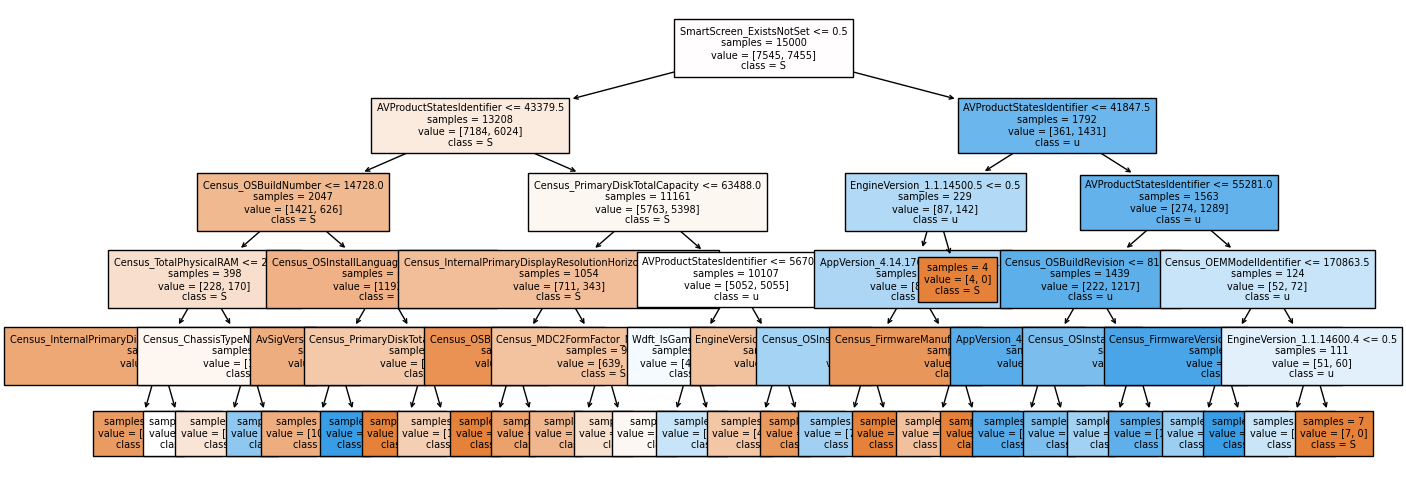

In [51]:
# ==================================================================================================================
# ===========================================> Modelo <=============================================================
# ==================================================================================================================

modelo = DecisionTreeClassifier(criterion= "entropy", max_depth=5, min_samples_leaf=3, random_state = 123)

modelo.fit(X_train_prep, y_train)

fig, ax = plt.subplots(figsize=(16, 6))

plot = plot_tree(
            decision_tree = modelo,
            feature_names = labels.tolist(),
            class_names   = 'Survived',
            filled        = True,
            impurity      = False,
            fontsize      = 7,
            ax            = ax)

In [46]:
predicciones = modelo.predict(X = X_test_prep)
pred_proba = modelo.predict_proba(X = X_test_prep)

<Axes: ylabel='predictor'>

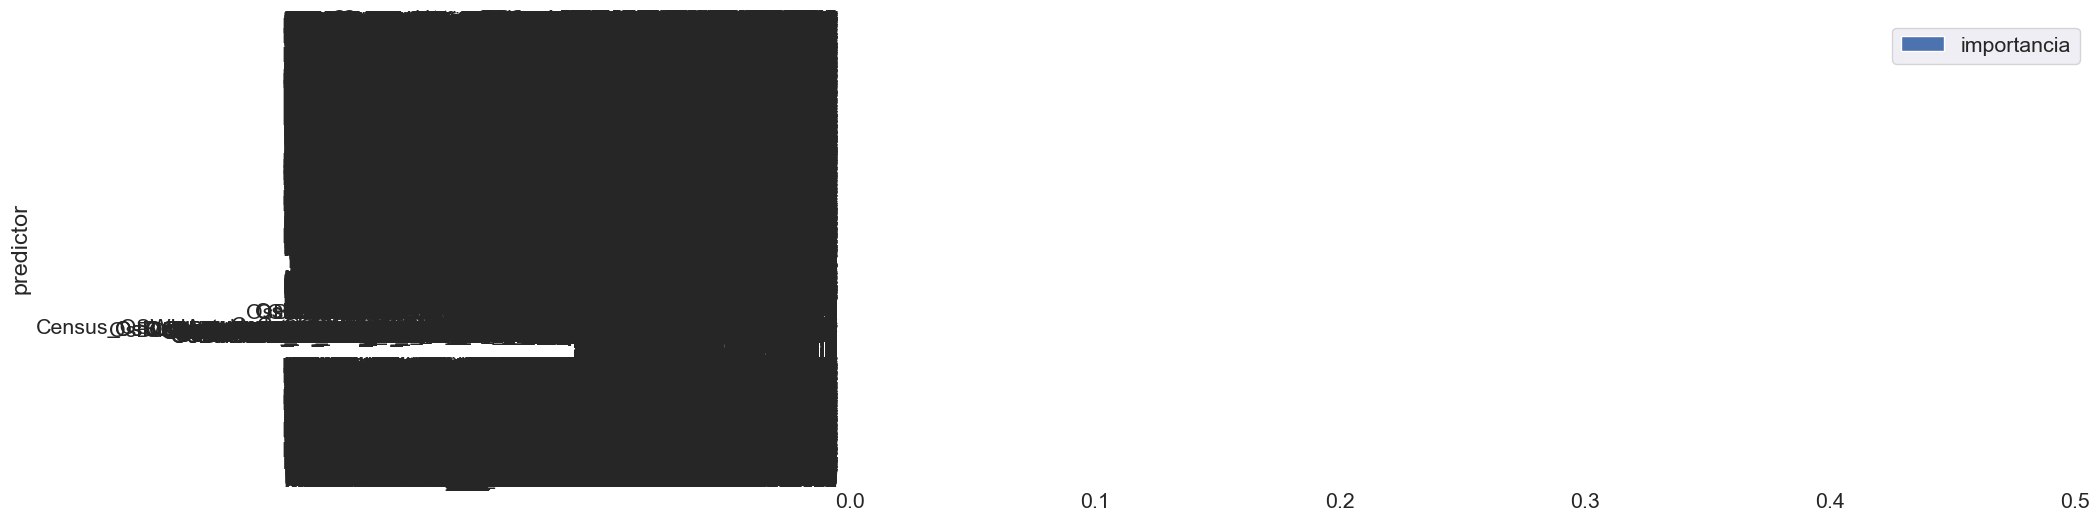

In [61]:
importancia_predictores = pd.DataFrame({
    "predictor": labels.tolist(),
    "importancia": modelo.feature_importances_
})

fig, ax = plt.subplots(figsize=(16, 6))

importancia_predictores.set_index("predictor").sort_values("importancia", ascending=True)[10:].plot(kind="barh", ax=ax)


Matriz de confusión


<Axes: >

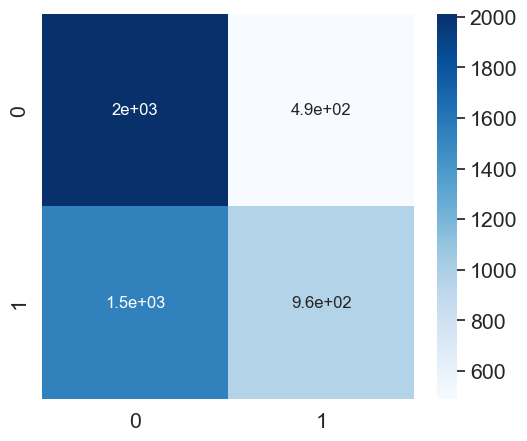

In [57]:
predicciones = modelo.predict(X = X_test_prep,)
pred_proba = modelo.predict_proba(X = X_test_prep)

data = confusion_matrix(y_test, predicciones)

print("Matriz de confusión")
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4) #for label size
sns.heatmap(data, cmap="Blues", annot=True, annot_kws={"size": 12})


In [58]:
print(f'Accuracy: {round(100*accuracy_score(y_test, predicciones),1)}%')

Accuracy: 59.4%


In [59]:
print(classification_report(y_test, predicciones, digits=3, zero_division=True))

              precision    recall  f1-score   support

           0      0.567     0.804     0.665      2502
           1      0.662     0.384     0.486      2498

    accuracy                          0.594      5000
   macro avg      0.614     0.594     0.576      5000
weighted avg      0.614     0.594     0.576      5000



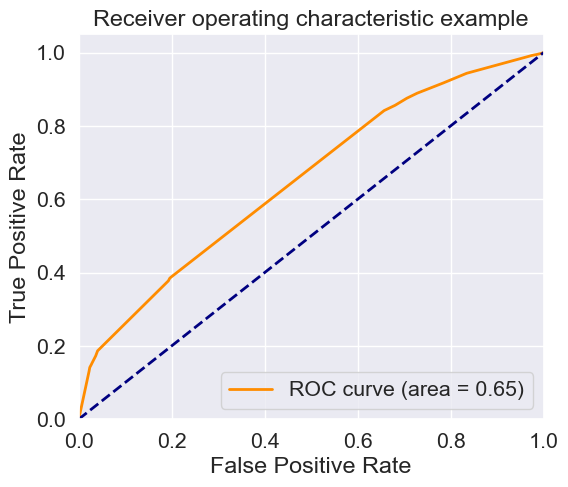

In [60]:
fpr, tpr, _ = roc_curve(y_test, pred_proba[:,1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# ==================================================================================================================
# ===========================================> Procesar Unique Tipos Cat <==========================================
# ==================================================================================================================

#typed_min_unique = 10
#typed_cols = []

#for c in datos.columns:
#    if ((datos[c].nunique() / datos[c].count()) * 100) <= typed_min_unique:
#        typed_cols.append(c)
        
#for c in typed_cols:
#    datos[c] = datos[c].astype("category")

#print(typed_cols)

In [ ]:
# ==================================================================================================================
# ===========================================> Procesar Object Tipos Cat <==========================================
# ==================================================================================================================

#typed_cols = []
#cat_cols = []

#for c in datos.columns:
#    if datos[c].dtype == "object":
#        typed_cols.append(c)
#        cat_cols.append(c)
        
#for c in typed_cols:
#   datos[c] = datos[c].astype("category")

#datos["HasDetections"] = datos["HasDetections"].astype(int)

#print(typed_cols)

In [ ]:
#from sklearn.compose import ColumnTransformer


#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score


# Dividir los datos en características (X) y etiquetas (y)
#X = datostos.drop('HasDetections', axis=1)
#y = datos['HasDetections']

# Dividir los datos en conjuntos de entrenamiento y prueba
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo (por ejemplo, RandomForestClassifier)
#model = RandomForestClassifier()
#model.fit(X_train, y_train)


# Realizar predicciones en el conjunto de prueba
#y_pred = model.predict(X_test)

# Calcular la precisión del modelo
#accuracy = accuracy_score(y_test, y_pred)
#print(f"Precisión del modelo: {accuracy}")



cat_cols = datos.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = datos.select_dtypes(include=['float64', 'int64']).columns.to_list()

preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough')

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop(columns = 'HasDetections'),
                                        datos['HasDetections'],
                                        random_state = 123)

X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols)
labels = np.concatenate([cat_cols, numeric_cols])

# Conversión a dataframe
X_train_prep = pd.DataFrame(X_train_prep.toarray(), columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep.toarray(), columns=labels)
X_train_prep.info()

modelo = DecisionTreeClassifier(max_depth=3, random_state = 123)

modelo.fit(X_train_prep, y_train)

# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(16, 6))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

#plot = plot_tree(
#            decision_tree = modelo,
#            feature_names = labels.tolist(),
#            class_names   = 'HasDetections',
#            filled        = True,
#            impurity      = False,
#            fontsize      = 7,
#            ax            = ax)